<a href="https://colab.research.google.com/github/dorobat-diana/LicentaAi/blob/main/MobileNetV2_FamousPlaces_Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Step 1: Import required libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import MobileNetV2


# 📌 Step 2: Mount Google Drive (if not already mounted)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 📌 Step 3: Load your previously trained model

In [ ]:
model_path = '/content/drive/MyDrive/ColabNotebooks/results/MobileNetV2_FamousPlaces/best_model.h5'
model = load_model(model_path)

# 📌 Step 4: Identify the MobileNetV2 base model inside your saved model

In [ ]:
base_model = None
for layer in model.layers:
    if isinstance(layer, tf.keras.Model) and 'mobilenetv2' in layer.name.lower():
        base_model = layer
        break

if base_model is None:
    raise ValueError("Could not find MobileNetV2 base model in the loaded model.")

# Step 5: Unfreeze the last N layers

In [ ]:
N = 5
base_model.trainable = True
for layer in base_model.layers[:-N]:
    layer.trainable = False


# Step 6: Recompile the model (needed after changing layer trainability)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



# Step 7: Save the updated model

In [ ]:
new_model_path = '/content/drive/MyDrive/ColabNotebooks/results/MobileNetV2_FamousPlaces/unfrozen_model.h5'
model.save(new_model_path)

print(f"✅ Model updated and saved to: {new_model_path}")

✅ Model updated and saved to: /content/drive/MyDrive/ColabNotebooks/results/MobileNetV2_FamousPlaces/unfrozen_model.h5


In [ ]:
# Step 1: Import required libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Paths to your train and test directories
train_dir = '/content/drive/MyDrive/ColabNotebooks/data/famous_places/train'
test_dir = '/content/drive/MyDrive/ColabNotebooks/data/famous_places/test'
# Step 2: Create ImageDataGenerators for data augmentation and loading
img_size = (224, 224)  # MobileNetV2 accepts 224x224 images
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize images to [0, 1]
    rotation_range=40,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Random shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill pixels after transformations
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Multi-class classification
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Multi-class classification
    shuffle=False  # Don't shuffle for evaluation
)


Found 3050 images belonging to 50 classes.
Found 3050 images belonging to 50 classes.


Fine tune the model with the 5 unfrozen layers

In [ ]:
# Step 3: Set up early stopping and model checkpointing to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/ColabNotebooks/results/MobileNetV2_FamousPlaces/fine_tuned_model.h5',
                             monitor='val_loss', save_best_only=True)

# Step 4: Fine-tune the model with a lower learning rate (since we already have a pre-trained model)
history = model.fit(
    train_generator,
    epochs=10,  # Adjust epochs based on your results
    validation_data=test_generator,
    callbacks=[early_stopping, checkpoint],
    verbose=2  # This will print one line per epoch
)

# Step 5: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


96/96 - 1914s - 20s/step - accuracy: 0.6905 - loss: 1.1867 - val_accuracy: 0.7748 - val_loss: 0.8649
Epoch 2/10


96/96 - 372s - 4s/step - accuracy: 0.7275 - loss: 1.0322 - val_accuracy: 0.7774 - val_loss: 0.8578
Epoch 3/10


96/96 - 370s - 4s/step - accuracy: 0.7380 - loss: 1.0045 - val_accuracy: 0.7777 - val_loss: 0.8575
Epoch 4/10


96/96 - 385s - 4s/step - accuracy: 0.7426 - loss: 0.9613 - val_accuracy: 0.7797 - val_loss: 0.8426
Epoch 5/10


96/96 - 380s - 4s/step - accuracy: 0.7466 - loss: 0.9521 - val_accuracy: 0.7862 - val_loss: 0.8244
Epoch 6/10


96/96 - 375s - 4s/step - accuracy: 0.7518 - loss: 0.9429 - val_accuracy: 0.7889 - val_loss: 0.8042
Epoch 7/10


96/96 - 371s - 4s/step - accuracy: 0.7538 - loss: 0.9100 - val_accuracy: 0.7954 - val_loss: 0.7812
Epoch 8/10


96/96 - 376s - 4s/step - accuracy: 0.7738 - loss: 0.8571 - val_accuracy: 0.8003 - val_loss: 0.7660
Epoch 9/10


96/96 - 384s - 4s/step - accuracy: 0.7777 - loss: 0.8375 - val_accuracy: 0.8023 - val_loss: 0.7493
Epoch 10/10


96/96 - 399s - 4s/step - accuracy: 0.7856 - loss: 0.8296 - val_accuracy: 0.8075 - val_loss: 0.7351
40/96 ━━━━━━━━━━━━━━━━━━━━ 1:25 2s/step - accuracy: 0.7643 - loss: 0.8031

In [ ]:
from tensorflow import keras
# Step 1: Import required libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = '/content/drive/MyDrive/ColabNotebooks/data/famous_places/test'
model = keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/results/MobileNetV2_FamousPlaces/fine_tuned_model.h5')  # or whatever your file is named
# Step 2: Create ImageDataGenerators for data augmentation and loading
img_size = (224, 224)  # MobileNetV2 accepts 224x224 images
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Multi-class classification
    shuffle=False  # Don't shuffle for evaluation
)

# Step 5: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Found 3050 images belonging to 50 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 820s 8s/step - accuracy: 0.7877 - loss: 0.7618
Test accuracy: 80.72%


96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step


TypeError: 'History' object is not subscriptable

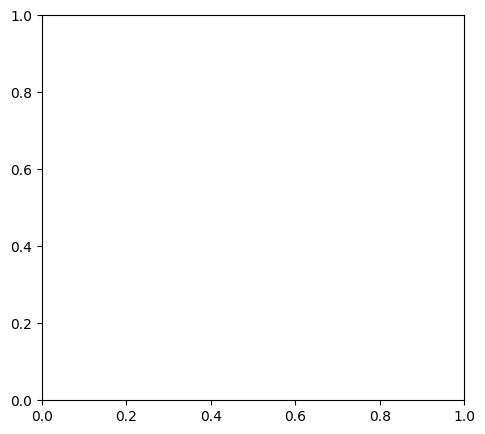

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import os

os.makedirs("report_assets", exist_ok=True)
class_labels = list(test_generator.class_indices.keys())
true_classes = test_generator.classes
pred_probs = model.predict(test_generator)
pred_classes = np.argmax(pred_probs, axis=1)

# --- Accuracy / Loss Curves ---
def plot_training_curves(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig("report_assets/training_curves.png")
    plt.close()

plot_training_curves(model)

# --- Confusion Matrix ---
cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig("report_assets/confusion_matrix.png")
plt.close()

# --- Classification Report as Text ---
report = classification_report(true_classes, pred_classes, target_names=class_labels)
with open("report_assets/classification_report.txt", "w") as f:
    f.write(report)

# --- Sample Predictions ---
def save_sample_predictions():
    test_generator.reset()
    images, labels = next(test_generator)
    preds = model.predict(images)
    pred_classes_batch = np.argmax(preds, axis=1)
    true_classes_batch = np.argmax(labels, axis=1)

    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        true_label = class_labels[true_classes_batch[i]]
        pred_label = class_labels[pred_classes_batch[i]]
        color = "green" if true_label == pred_label else "red"
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.tight_layout()
    plt.savefig("report_assets/sample_predictions.png")
    plt.close()

save_sample_predictions()


In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.platypus import Image
from reportlab.lib.units import inch

def generate_pdf_report():
    c = canvas.Canvas("FamousPlaces_CNN_Report.pdf", pagesize=letter)
    width, height = letter

    c.setFont("Helvetica-Bold", 16)
    c.drawString(72, height - 72, "CNN Fine-Tuning Report: Famous Places Classification")

    c.setFont("Helvetica", 12)
    c.drawString(72, height - 100, "Model: MobileNetV2 + Custom Classifier")
    c.drawString(72, height - 120, f"Image Size: 224x224 | Batch Size: 32 | Epochs: {len(history.history['loss'])}")

    c.drawImage("report_assets/training_curves.png", 72, height - 400, width=5.5*inch, preserveAspectRatio=True)
    c.showPage()

    c.drawString(72, height - 72, "Confusion Matrix")
    c.drawImage("report_assets/confusion_matrix.png", 72, height - 450, width=5.5*inch, preserveAspectRatio=True)
    c.showPage()

    c.drawString(72, height - 72, "Sample Predictions")
    c.drawImage("report_assets/sample_predictions.png", 72, height - 500, width=5.5*inch, preserveAspectRatio=True)
    c.showPage()

    c.drawString(72, height - 72, "Classification Report")
    with open("report_assets/classification_report.txt", "r") as f:
        lines = f.readlines()

    text_object = c.beginText(72, height - 100)
    text_object.setFont("Helvetica", 10)
    for line in lines:
        text_object.textLine(line.strip())
    c.drawText(text_object)

    c.save()

generate_pdf_report()
